In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import seaborn as sns

In [2]:
mydata=pd.read_csv("/content/Customer.csv")

In [3]:
mydata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Handle Missing Values

In [4]:
missing_values = mydata.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
mydata = mydata.dropna()# drop rows with missing values

covert categorical data to numerical data


In [6]:
labelencoder = LabelEncoder()
mydata['gender'] = labelencoder.fit_transform(mydata['gender'])
mydata['gender']

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7043, dtype: int64

In [7]:
mydata = pd.get_dummies(mydata, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
mydata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,No,Yes,...,29.85,29.85,No,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,No,No,34,Yes,No,Yes,No,...,56.95,1889.5,No,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,No,No,2,Yes,No,Yes,Yes,...,53.85,108.15,Yes,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,No,No,45,No,No phone service,Yes,No,...,42.30,1840.75,No,0,0,1,0,0,0,0
4,9237-HQITU,0,0,No,No,2,Yes,No,No,No,...,70.70,151.65,Yes,1,0,0,0,0,1,0


Remove Outliers


In [9]:
z_scores = zscore(mydata.select_dtypes(include=['number']))
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
mydata = mydata[~outliers]

In [10]:
mydata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,No,Yes,...,29.85,29.85,No,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,No,No,34,Yes,No,Yes,No,...,56.95,1889.5,No,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,No,No,2,Yes,No,Yes,Yes,...,53.85,108.15,Yes,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,No,No,45,No,No phone service,Yes,No,...,42.30,1840.75,No,0,0,1,0,0,0,0
4,9237-HQITU,0,0,No,No,2,Yes,No,No,No,...,70.70,151.65,Yes,1,0,0,0,0,1,0


In [11]:
mydata['Dependents'] = mydata['Dependents'].str.lower()
mydata['Dependents']

0        no
1        no
2        no
3        no
4        no
       ... 
7038    yes
7039    yes
7040    yes
7041     no
7042     no
Name: Dependents, Length: 7043, dtype: object

Normalization


In [12]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
mydata[numerical_cols] = mydata[numerical_cols].apply(pd.to_numeric, errors='coerce')
mydata = mydata.dropna(subset=numerical_cols)
scaler = StandardScaler()
mydata[numerical_cols] = scaler.fit_transform(mydata[numerical_cols])
print(mydata[numerical_cols])

        tenure  MonthlyCharges  TotalCharges
0    -1.280248       -1.161694     -0.994194
1     0.064303       -0.260878     -0.173740
2    -1.239504       -0.363923     -0.959649
3     0.512486       -0.747850     -0.195248
4    -1.239504        0.196178     -0.940457
...        ...             ...           ...
7038 -0.343137        0.664868     -0.129180
7039  1.612573        1.276493      2.241056
7040 -0.872808       -1.170004     -0.854514
7041 -1.158016        0.319168     -0.872095
7042  1.368109        1.357932      2.012344

[7032 rows x 3 columns]


In [13]:
mydata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,Yes,no,-1.280248,No,No phone service,No,Yes,...,-1.161694,-0.994194,No,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,No,no,0.064303,Yes,No,Yes,No,...,-0.260878,-0.173740,No,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,No,no,-1.239504,Yes,No,Yes,Yes,...,-0.363923,-0.959649,Yes,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,No,no,0.512486,No,No phone service,Yes,No,...,-0.747850,-0.195248,No,0,0,1,0,0,0,0
4,9237-HQITU,0,0,No,no,-1.239504,Yes,No,No,No,...,0.196178,-0.940457,Yes,1,0,0,0,0,1,0


In [14]:
mydata

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,Yes,no,-1.280248,No,No phone service,No,Yes,...,-1.161694,-0.994194,No,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,No,no,0.064303,Yes,No,Yes,No,...,-0.260878,-0.173740,No,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,No,no,-1.239504,Yes,No,Yes,Yes,...,-0.363923,-0.959649,Yes,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,No,no,0.512486,No,No phone service,Yes,No,...,-0.747850,-0.195248,No,0,0,1,0,0,0,0
4,9237-HQITU,0,0,No,no,-1.239504,Yes,No,No,No,...,0.196178,-0.940457,Yes,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,Yes,yes,-0.343137,Yes,Yes,Yes,No,...,0.664868,-0.129180,No,0,0,1,0,0,0,1
7039,2234-XADUH,0,0,Yes,yes,1.612573,Yes,Yes,No,Yes,...,1.276493,2.241056,No,1,0,1,0,1,0,0
7040,4801-JZAZL,0,0,Yes,yes,-0.872808,No,No phone service,Yes,No,...,-1.170004,-0.854514,No,0,0,0,0,0,1,0
7041,8361-LTMKD,1,1,Yes,no,-1.158016,Yes,Yes,No,No,...,0.319168,-0.872095,Yes,1,0,0,0,0,0,1


data cleaning completed

LINEAR REGRESSION MODEL

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [27]:
X = mydata.drop(['customerID', 'MonthlyCharges'], axis=1)
Y = mydata['MonthlyCharges']

categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['number']).columns),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge())])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

param_grid = {
    'regressor__alpha': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)

r_squared = r2_score(Y_test, Y_pred)

print("Best Model Parameters:", grid_search.best_params_)
print("R-squared on Test Set:", r_squared)
print("Predicted Values:", Y_pred)


Best Model Parameters: {'regressor__alpha': 0.01}
R-squared on Test Set: 0.9988271289160902
Predicted Values: [-1.48640202 -1.48881932 -1.48676485 ...  0.17066225  1.66830136
 -0.66193045]


In [ ]:
residuals = Y_test - Y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Polynomial Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = mydata.drop(['customerID', 'MonthlyCharges', 'Churn'], axis=1)
Y = mydata['MonthlyCharges']

categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', PolynomialFeatures(degree=2), X.select_dtypes(include=['number']).columns),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])
model = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)
print("Predicted Values:", Y_pred)


Mean Squared Error: 0.0011757467730671486
R-squared: 0.9988378218099835
Predicted Values: [-1.48600458 -1.49702143 -1.4859588  ...  0.18272711  1.68326117
 -0.66550897]


In [ ]:
residuals_poly = Y_test - Y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_pred, y=residuals_poly)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals vs. Predicted Values (Polynomial Regression)')
plt.xlabel('Predicted Values (Polynomial)')
plt.ylabel('Residuals (Polynomial)')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Values (Polynomial Regression)')
plt.xlabel('Actual Values (Polynomial)')
plt.ylabel('Predicted Values (Polynomial)')
plt.show()






Logisstic regression


Accuracy: 0.806680881307747
Confusion Matrix:
 [[934 104]
 [168 201]]
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.90      0.87      1038
         Yes       0.66      0.54      0.60       369

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



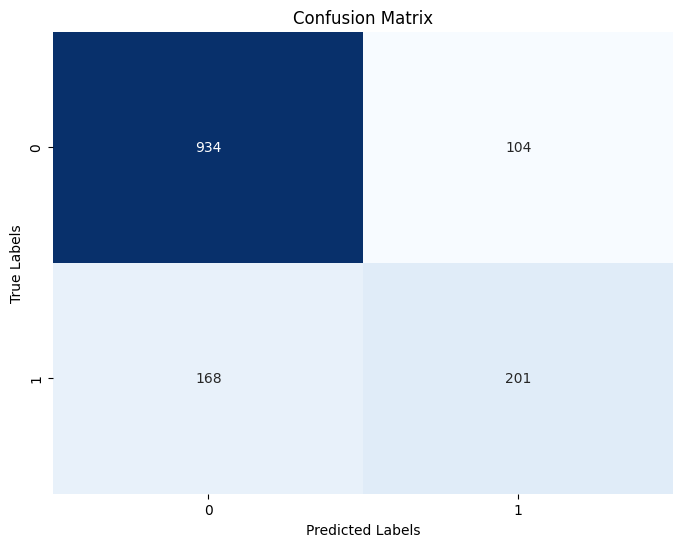

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

X = mydata.drop(['customerID', 'Churn'], axis=1)
Y = mydata['Churn']

categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X.select_dtypes(include=['number']).columns),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])
model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=0))])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Plot a Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
